Import all libraries

In [675]:
import numpy as np
import matplotlib.pyplot as plt

from KNN import Knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

Generate the dataset (500x1)
First cluster(circle)

In [676]:
def circle_eq(x, r):
    return np.sqrt(r ** 2 - x ** 2)

individs = 250
noise = 2

radius = 10
X = np.linspace(-radius, radius, individs)
X_up = X[::2]
X_down = X[::-2]
Y_up = circle_eq(X_up, radius) + np.random.randn(individs // 2) * noise
Y_down = -circle_eq(X_down, radius) + np.random.randn(individs // 2) * noise
X_circle = np.hstack((X_up, X_down))
Y_circle = np.hstack((Y_up, Y_down))

Generate second cluster(dot)

In [677]:
individs = 250
noise = 3
X_point = np.linspace(0, 0, individs)
Y_point = np.linspace(0, 0, individs)

X_point += np.random.randn(individs) * noise
Y_point += np.random.randn(individs) * noise

Combine all points and add classes.

In [678]:
X = np.stack((np.hstack((X_point, X_circle)), np.hstack((Y_point, Y_circle))), axis=1)
Y =  np.hstack((np.zeros(individs), np.ones(individs)))

Split into train and test.

In [679]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
Y_train = Y_train[:, np.newaxis]
Y_test = Y_test[:, np.newaxis]

Visualize.

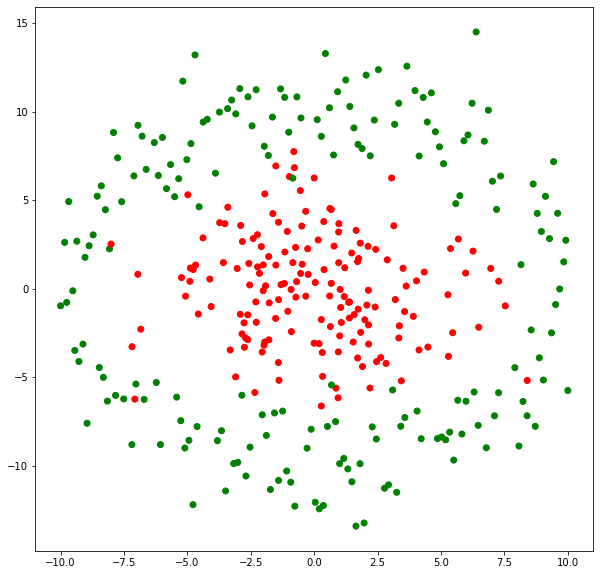

In [680]:
def get_col(Y):
    Y = Y.T[0]
    colors = ("red", "green", "blue", "yellow", "purple", "brown", "orange", "wight")
    colored_y = np.zeros(Y.size, dtype=str)
    unique = np.unique(Y,)
    for i, cl in enumerate(unique):
        colored_y[Y == cl] = str(colors[i])

    return colored_y


plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=get_col(Y_train))
plt.show()

Create, configure and train the model

In [681]:
knn = Knn(n_neighbors=10)
knn.fit(X_train, Y_train)

Check metrics:

In [682]:
predictions = knn.predict(X_test)
print(f"MSE: {mse(Y_test, predictions)}")

100%|██████████| 150/150 [00:00<00:00, 194.95it/s]

MSE: 0.036533333333333334


Visualization

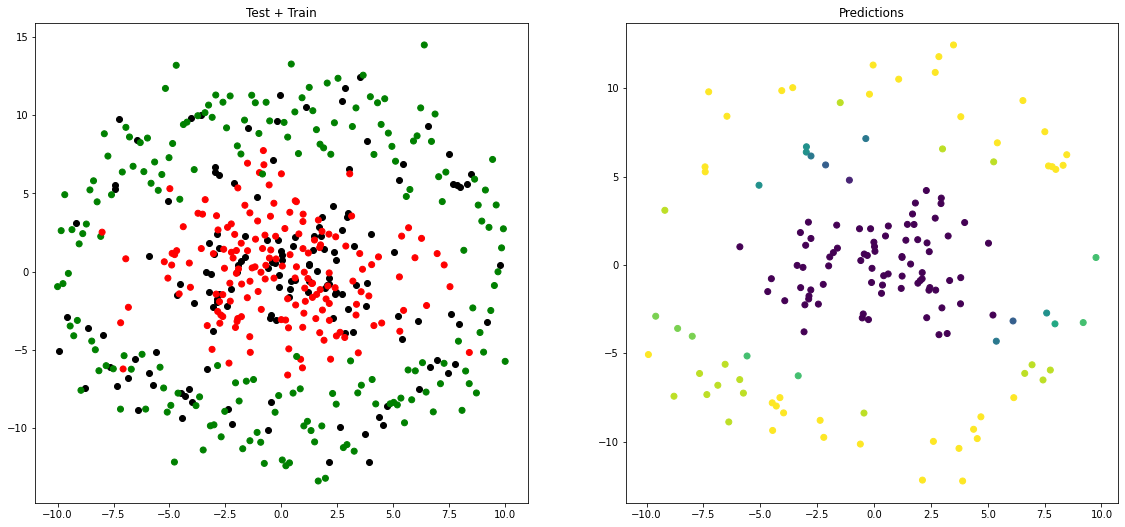

In [683]:
plt.figure(figsize=(30, 30))
fst_plt = plt.subplot2grid((3, 3), (0, 0), title="Test + Train")

fst_plt.scatter(X_test[:, 0], X_test[:, 1], c='black')
fst_plt.scatter(X_train[:, 0], X_train[:, 1], c=get_col(Y_train))

snd_plt = plt.subplot2grid((3, 3), (0, 1), title="Predictions")
snd_plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)

plt.show()